# Counts Analysis

Co-occurence of terms analysis: check how often pre-selected cognitive terms appear in abstracts with ERP terms. 

This analysis searches through pubmed for papers that contain specified ERP and selected association terms.

Data extracted is the count of the number of papers with both terms. This is used to infer the associated terms for each ERP.

In [1]:
%matplotlib inline

import numpy as np
from scipy.stats import normaltest

from lisc import Counts
from lisc.utils import SCDB, load_object
from lisc.plts.counts import plot_matrix, plot_clustermap, plot_dendrogram

In [2]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist, plot_time_associations
from analysis import get_time_associations

## Setup

In [3]:
# Settings
SAVE_FIG = False

In [4]:
# Set the file locations
term_dir = '../terms/'
figs_dir = '../data/figures/counts'
db = SCDB('../data/')

# Set the name of the file to load
name = 'cognitive'         # 'cognitive', 'disease', 'test'

In [5]:
# Load the counts object
counts = load_object('counts_' + name, directory=db)

### Check Database Information

Check the metadata about the data collection, including checking the database data were collected from.

In [6]:
# Check database information
counts.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210226-2212m.3',
 'count': '32200710',
 'lastupdate': '2021/02/27 15:01'}

In [7]:
# Check requester details
counts.meta_data.requester

{'n_requests': 8009,
 'wait_time': 0.1,
 'start_time': '10:15:11 Sunday 28 February 2021',
 'end_time': '10:59:20 Sunday 28 February 2021',
 'logging': None}

# Global Summaries

The total # of ERP papers is 		 31772
Test for normality (log-spaced) 	 t-val: 7.25 	 p-val 0.03


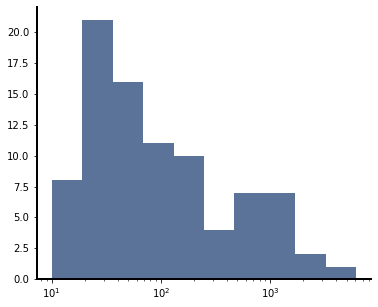

In [8]:
# Check the distribution of ERP papers
print('The total # of ERP papers is \t\t {:.0f}'.format(sum(counts.terms['A'].counts)))
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
      *normaltest(np.log10(counts.terms['A'].counts))))
plot_count_hist(counts.terms['A'].counts, 
                save_fig=SAVE_FIG, f_name='erp_hist.pdf', directory=figs_dir)

The total # of association papers is 		 8903115
Test for normality (log-spaced) 	 t-val: 7.92 	 p-val 0.02


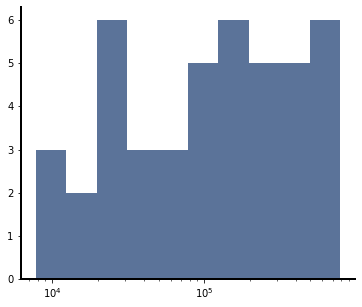

In [9]:
# Check the distribution of ERP papers
print('The total # of association papers is \t\t {:.0f}'.format(sum(counts.terms['B'].counts)))
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
      *normaltest(np.log10(counts.terms['B'].counts))))
plot_count_hist(counts.terms['B'].counts,
                save_fig=SAVE_FIG, f_name=name + '_assoc_hist.pdf', directory=figs_dir)

# Check Counts

In [11]:
# Check the terms with the most papers
counts.check_top(dim='A')
counts.check_top(dim='B')

The most studied term is  'P300'  with  6110  articles.
The most studied term is  'intelligence'  with  785384  articles.


In [12]:
# Check how many papers were found for each ERP term
counts.check_counts(dim='A')

The number of documents found for each search term is:
  'P100'    -   1822
  'P150'    -    217
  'P170'    -     39
  'P180'    -     92
  'P200'    -    843
  'P220'    -     50
  'P230'    -     27
  'P240'    -     31
  'P250'    -     97
  'P270'    -     17
  'P300'    -   6110
  'P3a'     -   1007
  'P3b'     -   1054
  'P340'    -     10
  'P350'    -     72
  'P400'    -    180
  'P500'    -     66
  'P550'    -     16
  'P600'    -    708
  'N100'    -   1021
  'N110'    -     22
  'N120'    -     56
  'N130'    -     40
  'N140'    -    176
  'N150'    -    120
  'N160'    -     64
  'N170'    -   1357
  'N180'    -     38
  'N190'    -     23
  'N200'    -    769
  'N2a'     -    174
  'N2b'     -    233
  'N2c'     -     35
  'N2pc'    -    497
  'N240'    -     19
  'N250'    -    265
  'N270'    -     66
  'N280'    -     23
  'N290'    -     51
  'N300'    -    195
  'N320'    -     25
  'N350'    -     83
  'N400'    -   2555
  'N450'    -    177
  'N550'    -     52


In [13]:
# Check how many papers were found for each association term
counts.check_counts(dim='B')

The number of documents found for each search term is:
  'anticipation'         -   373676
  'attention'            -   446655
  'arousal'              -    29215
  'auditory'             -   105329
  'awareness'            -   159131
  'categorization'       -    16704
  'cognitive control'    -     7778
  'comprehension'        -    25676
  'conflict'             -    54771
  'conscious'            -    81772
  'decision making'      -   148983
  'emotion'              -   254820
  'error'                -   208881
  'executive function'   -    23979
  'expectation'          -    28176
  'face'                 -   311553
  'fear'                 -    68619
  'goal'                 -   261167
  'illusion'             -    10119
  'intelligence'         -   785384
  'language'             -   158177
  'learning'             -   334770
  'memory'               -   263732
  'motor'                -   705891
  'music'                -    20915
  'pain'                 -   659788
  'percep

In [14]:
# Check the most commonly associated association term for each ERP
counts.check_data()

For  'P100'   the highest association is  'vision'              with        1211
For  'P150'   the highest association is  'vision'              with          41
For  'P170'   the highest association is  'vision'              with           9
For  'P180'   the highest association is  'motor'               with          17
For  'P200'   the highest association is  'auditory'            with         288
For  'P220'   the highest association is  'vision'              with           9
For  'P230'   the highest association is  'vision'              with           9
For  'P240'   the highest association is  'somatosensory'       with          10
For  'P250'   the highest association is  'vision'              with          25
For  'P270'   the highest association is  'vision'              with           8
For  'P300'   the highest association is  'auditory'            with        1873
For  'P3a'    the highest association is  'attention'           with         492
For  'P3b'    the highest as

In [15]:
# Check the most commonly associated ERP for each term
counts.check_data(dim='B')

For  'anticipation'        the highest association is  'CNV'    with         269
For  'attention'           the highest association is  'P300'   with        1343
For  'arousal'             the highest association is  'P300'   with         143
For  'auditory'            the highest association is  'MMN'    with        2172
For  'awareness'           the highest association is  'P300'   with          89
For  'categorization'      the highest association is  'N170'   with          96
For  'cognitive control'   the highest association is  'ERN'    with         153
For  'comprehension'       the highest association is  'N400'   with         557
For  'conflict'            the highest association is  'ERN'    with         134
For  'conscious'           the highest association is  'P300'   with         173
For  'decision making'     the highest association is  'FRN'    with         143
For  'emotion'             the highest association is  'LPP'    with         630
For  'error'               t

## Select ERPs with enough articles

In [16]:
# Check how many ERPs currently
counts.terms['A'].n_terms

88

In [17]:
# Drop ERPs without a target number of articles
counts.drop_data(150, dim='A')
print(counts.terms['A'].n_terms)

32


## Group Level Plots

In [18]:
# Compute the normalized score (percent association)
counts.compute_score('normalize', dim='A')

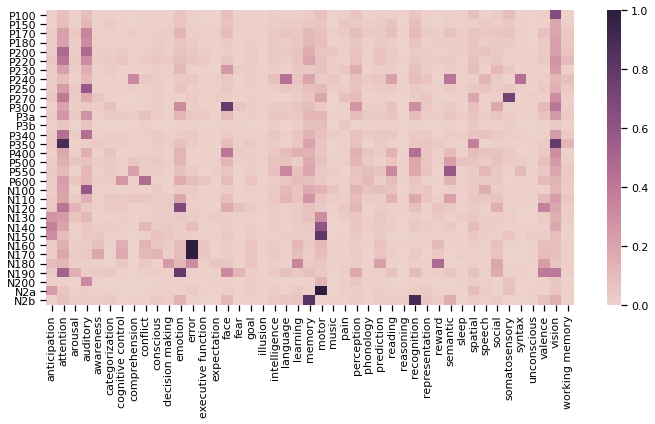

In [19]:
# Plot the matrix of percent associations - ERPs & terms
plot_matrix(counts, figsize=(10, 6), 
            save_fig=SAVE_FIG, f_name=name+'_associations.pdf', directory=figs_dir)

### Similarity Measure

In [20]:
# Calculate similarity between all ERPs (based on term association percents)
counts.compute_score('similarity')

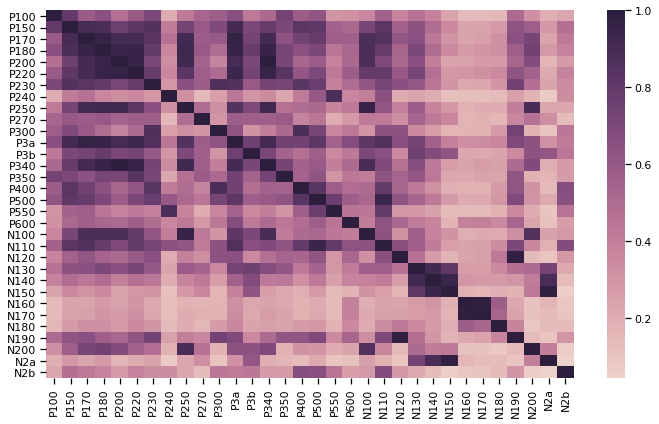

In [21]:
# Plot similarity matrix between ERPs
plot_matrix(counts, figsize=(10, 6),
            save_fig=SAVE_FIG, f_name=name+'_similarity.pdf', directory=figs_dir)

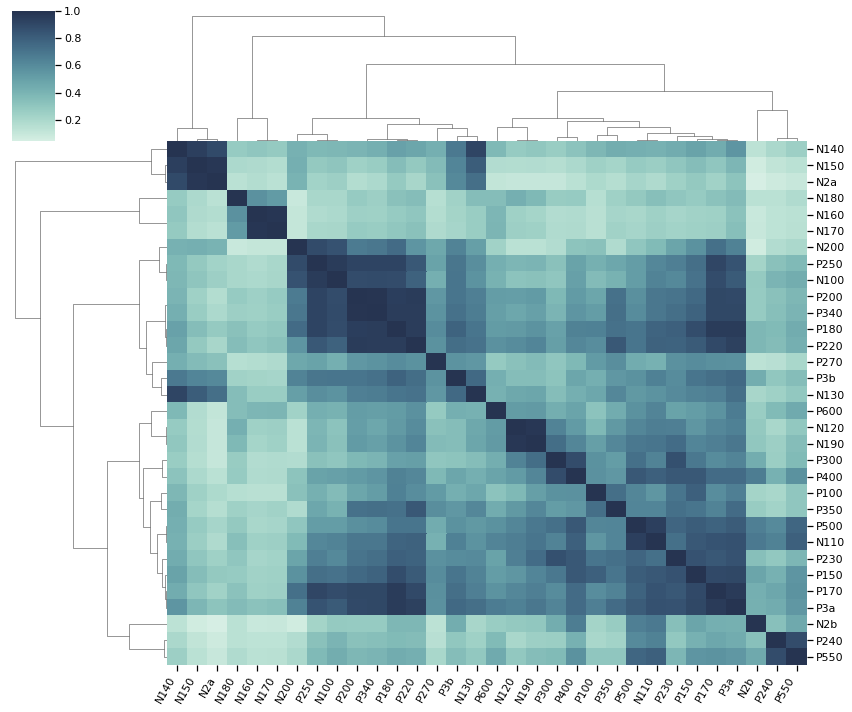

In [22]:
# Plot a clustermap, clustering ERPs and terms based on similarity
plot_clustermap(counts, cmap='blue', figsize=(12, 10),
                save_fig=SAVE_FIG, f_name=name+'_cluster.pdf', directory=figs_dir)

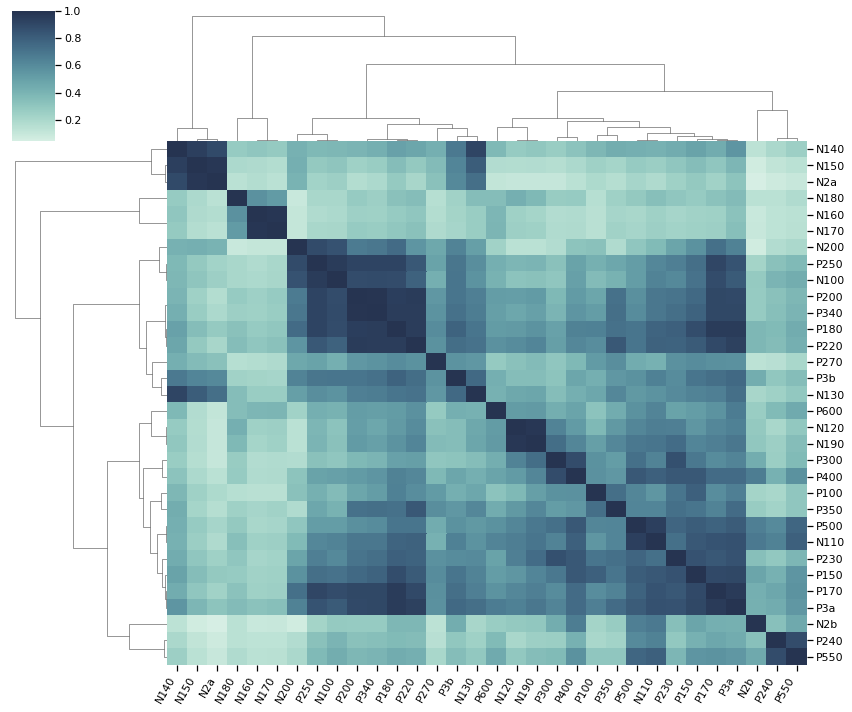

In [23]:
# Plot a clustermap, clustering ERPs and terms based on similarity
plot_clustermap(counts, cmap='blue', figsize=(12, 10),
                save_fig=SAVE_FIG, f_name=name+'_similarity_cluster.pdf', directory=figs_dir)

### Association Score

In [24]:
# Calculate association between all ERPs
counts.compute_score('association')

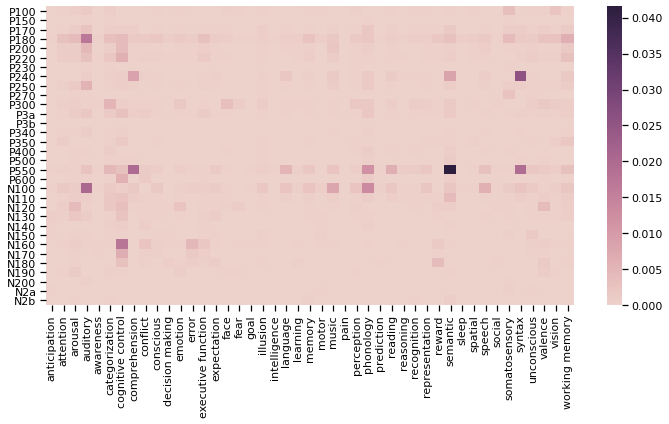

In [25]:
# Plot similarity matrix between terms
plot_matrix(counts, figsize=(10, 6),
            save_fig=SAVE_FIG, f_name=name+'_associations.pdf', directory=figs_dir)

### Dendrograms

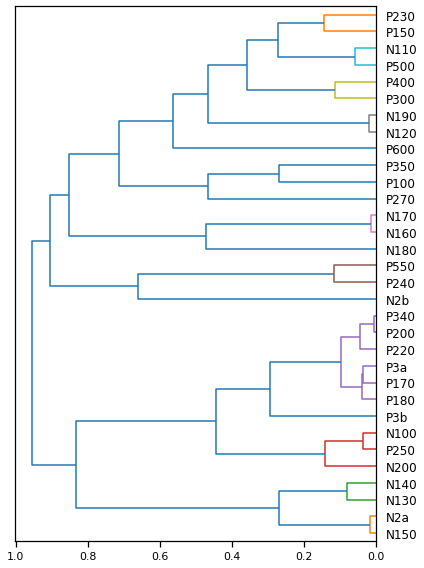

In [26]:
# Plot dendrogram of ERPs, based on percent associations with terms
plot_dendrogram(counts, attribute='counts', figsize=(6, 8),
                save_fig=SAVE_FIG, f_name=name+'_erp_dendro.pdf', directory=figs_dir)

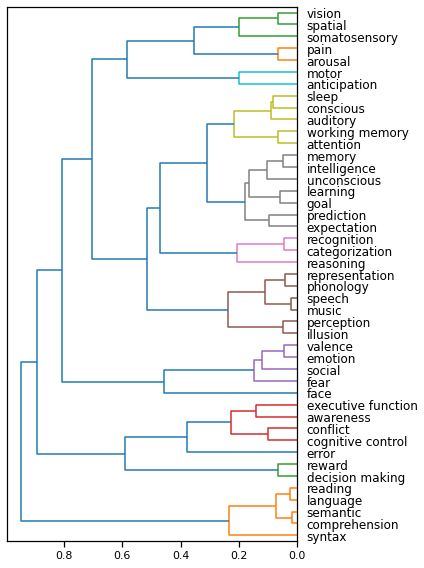

In [27]:
# Plot dendrogram of termss, based on percent associations with ERPs
plot_dendrogram(counts, attribute='counts', transpose=True, figsize=(6, 8),
                save_fig=SAVE_FIG, f_name=name+'term_dendro.pdf', directory=figs_dir)

### Function correlates across time

In [28]:
# Re-compute normalized score
counts.compute_score('normalize')

In [29]:
# Get the time and polarity information for the ERPs
time_associations = get_time_associations(counts)

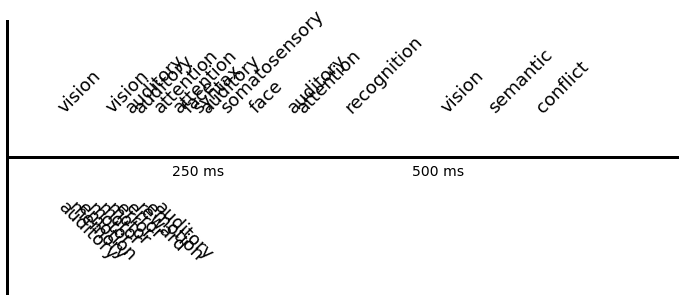

In [30]:
# Plot time associations
plot_time_associations(time_associations,
                       save_fig=SAVE_FIG, f_name=name+'time.pdf', directory=figs_dir)